## Analisis Regresi Orange Quality Data

Nama Kelompok: Cheesecake

Nama Anggota: 
1. Nikita Aprilia Ozzari (23083010028)
2. Indira Zein Rizqin (23083010015)

## Regresi Linear Berganda

In [107]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import t 

data = pd.read_csv("C://Users//Nikita Ozzari//Documents//Orange Quality Data.csv")
data.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [108]:
X = data[["Size (cm)","Weight (g)", "HarvestTime (days)", "Ripeness (1-5)", "Softness (1-5)", "Brix (Sweetness)", "pH (Acidity)"]]
y = data["Quality (1-5)"]

In [109]:
X = np.column_stack((np.ones(X.shape[0]), X)) 

In [110]:
model = LinearRegression(fit_intercept=False)  # Intercept sudah ditambahkan manual
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [111]:
coef = model.coef_

In [112]:
y_pred = model.predict(X)

In [113]:
# Uji Signifikansi Koefisien Regresi

n = X.shape[0]  
p = X.shape[1] + 1 
df = n - p 

residuals = y - y_pred
residual_std_error = np.sqrt(np.sum(residuals**2) / (n - p))

# Matriks kovarian
X_inv = np.linalg.inv(X.T @ X)  # Inverse dari matriks X'X
se = np.sqrt(np.diagonal(X_inv)) * residual_std_error  # Standard error untuk setiap koefisien

# Hitung statistik t dan p-value
t_values = coef / se  # Statistik T
p_values = [2 * (1 - t.cdf(np.abs(t_val), df=n - p)) for t_val in t_values]  # P-value

# Tampilkan hasil
result = pd.DataFrame({
    "Variable": ["Intercept"] + list(data[["Size (cm)","Weight (g)", "HarvestTime (days)", "Ripeness (1-5)", "Softness (1-5)", "Brix (Sweetness)", "pH (Acidity)"]].columns),  # Nama variabel
    "Coefficient": coef,
    "Standard Error": se,
    "T-Statistic": t_values,
    "P-Value": p_values
})

print(result)

             Variable  Coefficient  Standard Error  T-Statistic   P-Value
0           Intercept     2.509288        0.658732     3.809267  0.000179
1           Size (cm)     0.066393        0.048727     1.362541  0.174349
2          Weight (g)    -0.001553        0.000947    -1.640387  0.102280
3  HarvestTime (days)    -0.047242        0.010200    -4.631311  0.000006
4      Ripeness (1-5)     0.101909        0.041703     2.443710  0.015284
5      Softness (1-5)     0.015742        0.040605     0.387692  0.698600
6    Brix (Sweetness)     0.189857        0.019117     9.931182  0.000000
7        pH (Acidity)    -0.188652        0.126863    -1.487056  0.138358


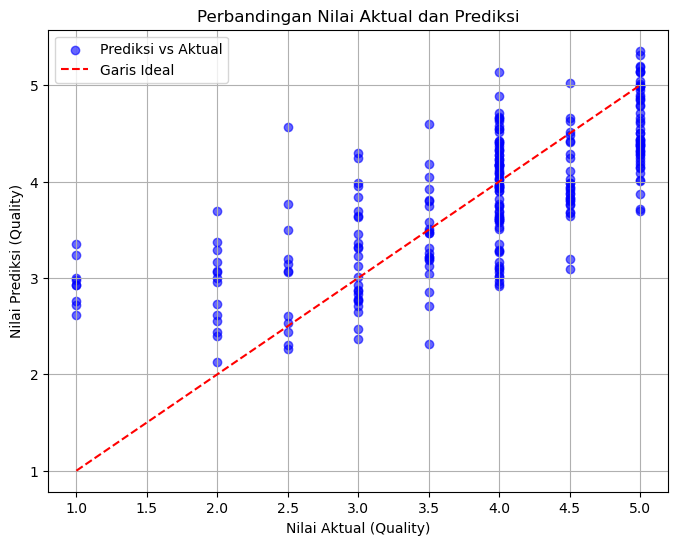

In [114]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.6, label="Prediksi vs Aktual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Garis Ideal")
plt.xlabel("Nilai Aktual (Quality)")
plt.ylabel("Nilai Prediksi (Quality)")
plt.title("Perbandingan Nilai Aktual dan Prediksi")
plt.legend()
plt.grid(True)
plt.show()

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Pilih variabel independen
X = data[["Size (cm)","Weight (g)", "HarvestTime (days)", "Ripeness (1-5)", "Softness (1-5)", "Brix (Sweetness)", "pH (Acidity)"]]

# Tambahkan konstanta untuk perhitungan VIF
X_with_const = sm.add_constant(X)

# Hitung VIF untuk setiap variabel independen
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print("Hasil Uji Multikolinearitas (VIF):")
print(vif_data)

Hasil Uji Multikolinearitas (VIF):
             Variable         VIF
0               const  199.730271
1           Size (cm)    1.283591
2          Weight (g)    1.309905
3  HarvestTime (days)    1.351798
4      Ripeness (1-5)    1.157913
5      Softness (1-5)    1.324099
6    Brix (Sweetness)    1.276529
7        pH (Acidity)    1.307577


In [116]:
# Menambahkan kolom signifikansi
alpha = 0.05  # Tingkat signifikansi 5%
result["Significant"] = result["P-Value"] < alpha

# Menampilkan hasil dengan informasi tambahan
print("\nHasil Uji Signifikansi:")
print(result)

# Interpretasi otomatis
print("\nInterpretasi Signifikansi:")
for index, row in result.iterrows():
    if row["Significant"]:
        print(f"Koefisien '{row['Variable']}' signifikan secara statistik (p-value = {row['P-Value']:.5f}).")
    else:
        print(f"Koefisien '{row['Variable']}' tidak signifikan secara statistik (p-value = {row['P-Value']:.5f}).")


Hasil Uji Signifikansi:
             Variable  Coefficient  Standard Error  T-Statistic   P-Value  \
0           Intercept     2.509288        0.658732     3.809267  0.000179   
1           Size (cm)     0.066393        0.048727     1.362541  0.174349   
2          Weight (g)    -0.001553        0.000947    -1.640387  0.102280   
3  HarvestTime (days)    -0.047242        0.010200    -4.631311  0.000006   
4      Ripeness (1-5)     0.101909        0.041703     2.443710  0.015284   
5      Softness (1-5)     0.015742        0.040605     0.387692  0.698600   
6    Brix (Sweetness)     0.189857        0.019117     9.931182  0.000000   
7        pH (Acidity)    -0.188652        0.126863    -1.487056  0.138358   

   Significant  
0         True  
1        False  
2        False  
3         True  
4         True  
5        False  
6         True  
7        False  

Interpretasi Signifikansi:
Koefisien 'Intercept' signifikan secara statistik (p-value = 0.00018).
Koefisien 'Size (cm)' tidak s

In [117]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Hitung MSE
mse = mean_squared_error(y, y_pred)

# Hitung RMSE
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 0.5040
Root Mean Squared Error (RMSE): 0.7100


In [118]:
#Uji Hipotesis dan Keputusan

# Hitung standard error untuk intercept
se_intercept = np.sqrt(X_inv[0, 0]) * residual_std_error

# Hitung t-statistik dan p-value untuk intercept
intercept_t_value = model.intercept_ / se_intercept
intercept_p_value = 2 * (1 - t.cdf(np.abs(intercept_t_value), df))

# Hasil
print(f"Intercept:")
print(f" - Nilai Intercept: {model.intercept_:.4f}")
print(f" - Nilai t-Statistik: {intercept_t_value:.4f}")
print(f" - Nilai P-Value: {intercept_p_value:.4f}")

# Keputusan hipotesis
alpha = 0.05
if intercept_p_value < alpha:
    print("Keputusan: Intercept signifikan pada tingkat signifikansi 5%.")
else:
    print("Keputusan: Intercept tidak signifikan pada tingkat signifikansi 5%.")

# Keputusan hipotesis
alpha = 0.05  
print("Keputusan Hipotesis untuk Koefisien:")
for i, (coef_val, t_val, p_val) in enumerate(zip(model.coef_, t_values, p_values)):
    print(f"Koefisien {i + 1}:")
    print(f" - Nilai Koefisien: {coef_val:.4f}")
    print(f" - Nilai t-Statistik: {t_val:.4f}")
    print(f" - Nilai P-Value: {p_val:.4f}")
    if p_val < alpha:
        print("   -> Keputusan: Tolak H0 (koefisien signifikan)")
    else:
        print("   -> Keputusan: Gagal Tolak H0 (koefisien tidak signifikan)")

# Keputusan untuk intercept
print("\nKeputusan Hipotesis untuk Intercept:")
print(f"Intercept:")
print(f" - Nilai Intercept: {model.intercept_:.4f}")
print(f" - Nilai t-Statistik: {intercept_t_value:.4f}")
print(f" - Nilai P-Value: {intercept_p_value:.4f}")
if intercept_p_value < alpha:
    print("   -> Keputusan: Tolak H0 (intercept signifikan)")
else:
    print("   -> Keputusan: Gagal Tolak H0 (intercept tidak signifikan)")

Intercept:
 - Nilai Intercept: 0.0000
 - Nilai t-Statistik: 0.0000
 - Nilai P-Value: 1.0000
Keputusan: Intercept tidak signifikan pada tingkat signifikansi 5%.
Keputusan Hipotesis untuk Koefisien:
Koefisien 1:
 - Nilai Koefisien: 2.5093
 - Nilai t-Statistik: 3.8093
 - Nilai P-Value: 0.0002
   -> Keputusan: Tolak H0 (koefisien signifikan)
Koefisien 2:
 - Nilai Koefisien: 0.0664
 - Nilai t-Statistik: 1.3625
 - Nilai P-Value: 0.1743
   -> Keputusan: Gagal Tolak H0 (koefisien tidak signifikan)
Koefisien 3:
 - Nilai Koefisien: -0.0016
 - Nilai t-Statistik: -1.6404
 - Nilai P-Value: 0.1023
   -> Keputusan: Gagal Tolak H0 (koefisien tidak signifikan)
Koefisien 4:
 - Nilai Koefisien: -0.0472
 - Nilai t-Statistik: -4.6313
 - Nilai P-Value: 0.0000
   -> Keputusan: Tolak H0 (koefisien signifikan)
Koefisien 5:
 - Nilai Koefisien: 0.1019
 - Nilai t-Statistik: 2.4437
 - Nilai P-Value: 0.0153
   -> Keputusan: Tolak H0 (koefisien signifikan)
Koefisien 6:
 - Nilai Koefisien: 0.0157
 - Nilai t-Statistik

In [119]:
# Membuat model regresi linier dengan OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Menampilkan ringkasan hasil model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          Quality (1-5)   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              940.1
Date:                Sun, 24 Nov 2024   Prob (F-statistic):                   2.04e-167
Time:                        18:06:54   Log-Likelihood:                         -266.72
No. Observations:                 241   AIC:                                      547.4
Df Residuals:                     234   BIC:                                      571.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

## Regresi Lasso

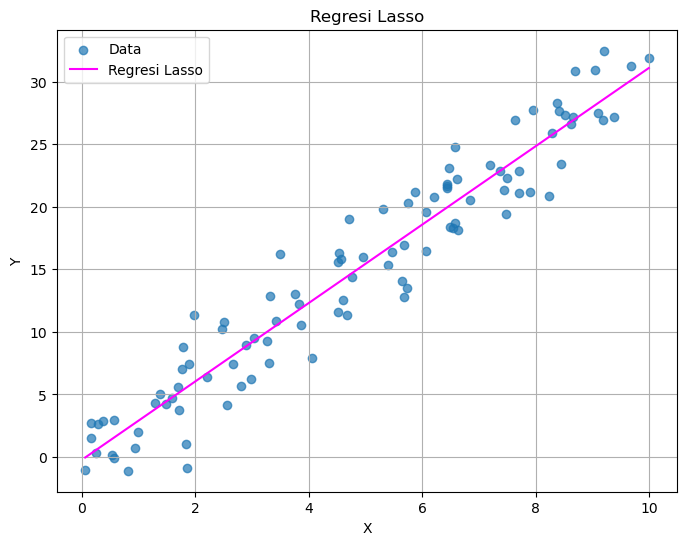

In [77]:
from sklearn.linear_model import Lasso

# Data simulasi
X = np.random.rand(100, 1) * 10
y = 3 * X[:, 0] + np.random.normal(0, 3, 100)

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="Data", alpha=0.7)
plt.plot(np.sort(X[:, 0]), lasso.predict(np.sort(X, axis=0)), color="magenta", label="Regresi Lasso")
plt.title("Regresi Lasso")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

## Regresi Dummy

In [120]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. Muat Data
data = pd.read_csv("C://Users//Nikita Ozzari//Documents//Orange Quality Data.csv")

# 2. Encode variabel kategorikal
data_encoded = pd.get_dummies(data, columns=['Color', 'Variety', 'Blemishes (Y/N)'], drop_first=True).astype(int)

# 3. Menghapus kolom yang tidak diinginkan
data_encoded = data_encoded.drop(['Size (cm)', 'Weight (g)', 'pH (Acidity)', 'Softness (1-5)', 'HarvestTime (days)', 
                                  'Ripeness (1-5)', 'Brix (Sweetness)'], axis=1)

# 4. Tentukan variabel dependen dan variabel independen
categorical_columns = [col for col in data_encoded.columns if col != 'Quality (1-5)']
y = data_encoded['Quality (1-5)'].values  # Dependent variable
X = data_encoded[categorical_columns].values  # Independent variables

# 5. Pastikan semua kolom X adalah tipe numerik dan dalam bentuk 2D
X = np.array(X).astype(np.float64)  # Mengkonversi menjadi array 2D dan pastikan tipe datanya numerik

# 6. Tambahkan kolom intercept
X = add_constant(X)  # Menambahkan intercept secara otomatis

# 7. Hitung koefisien regresi (β) 
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
XtY = X.T @ y
beta = XtX_inv @ XtY

# 8. Prediksi nilai dan hitung residuals
y_hat = X @ beta
residuals = y - y_hat

# 9. Hitung Sum of Squares
SSR = np.sum((y_hat - np.mean(y))**2)  # Sum of Squares Regression
SSE = np.sum((y - y_hat)**2)  # Sum of Squares Error
SST = SSR + SSE  # Sum of Squares Total

# 10. Degrees of freedom
n = len(y)
p = X.shape[1] - 1  # Excluding intercept
df_regression = p
df_error = n - p - 1

# 11. Mean Squares
MSR = SSR / df_regression
MSE = SSE / df_error

# 12. Standard Errors for coefficients
standard_errors = np.sqrt(np.diag(MSE * XtX_inv))

# 13. t-values and p-values
t_values = beta / standard_errors
p_values = [2 * (1 - stats.t.cdf(np.abs(t_val), df_error)) for t_val in t_values]

# 14. t-table value (for hypothesis testing)
alpha = 0.05
t_table_value = stats.t.ppf(1 - alpha / 2, df_error)

# 15. Output regression results
print("                          Hasil Analisis Regresi")
print("Source of Variation    Sum of Squares    Degrees of Freedom    Mean Square      F0        P Value")
print(f"Regression            {SSR:.3f}             {df_regression}                   {MSR:.3f}         {MSR/MSE:.2f}      {p_values[1]:.2e}")
print(f"Error                 {SSE:.3f}             {df_error}                  {MSE:.3f}")
print(f"Total                 {SST:.3f}             {n - 1}\n")

print("Coefficient    Estimate    Standard Error    t0     P Value    t-table")
for i, (b, se, t_val, p_val) in enumerate(zip(beta, standard_errors, t_values, p_values)):
    print(f"Beta_{i:<2}         {b:<10.3f} {se:<15.3f} {t_val:<6.2f} {p_val:<10.3e} {t_table_value:<5.2f}")

# 16. R-squared
R_squared = SSR / SST
print(f"\nR^2 = {R_squared:.4f}")

# 17. Persamaan regresi
regression_equation = f"Quality = {beta[0]:.3f} "  # Memulai persamaan dengan intercept

# Menambahkan koefisien untuk setiap fitur kategorikal
for i in range(1, len(beta)):
    regression_equation += f" + {beta[i]:.3f} * {categorical_columns[i-1]}"  # Menambahkan variabel dan koefisien terkait

# Menampilkan persamaan regresi
print("\nPersamaan regresi:")
print(regression_equation)

                          Hasil Analisis Regresi
Source of Variation    Sum of Squares    Degrees of Freedom    Mean Square      F0        P Value
Regression            113.360             38                   2.983         4.05      1.55e-15
Error                 148.673             202                  0.736
Total                 262.033             240

Coefficient    Estimate    Standard Error    t0     P Value    t-table
Beta_0          4.571      0.300           15.23  0.000e+00  1.97 
Beta_1          -1.464     0.169           -8.66  1.554e-15  1.97 
Beta_2          -0.863     0.200           -4.31  2.542e-05  1.97 
Beta_3          -0.589     0.180           -3.27  1.248e-03  1.97 
Beta_4          -0.767     0.377           -2.03  4.333e-02  1.97 
Beta_5          -0.982     0.674           -1.46  1.468e-01  1.97 
Beta_6          0.350      0.437           0.80   4.236e-01  1.97 
Beta_7          -0.468     0.344           -1.36  1.757e-01  1.97 
Beta_8          -0.172     0.368  

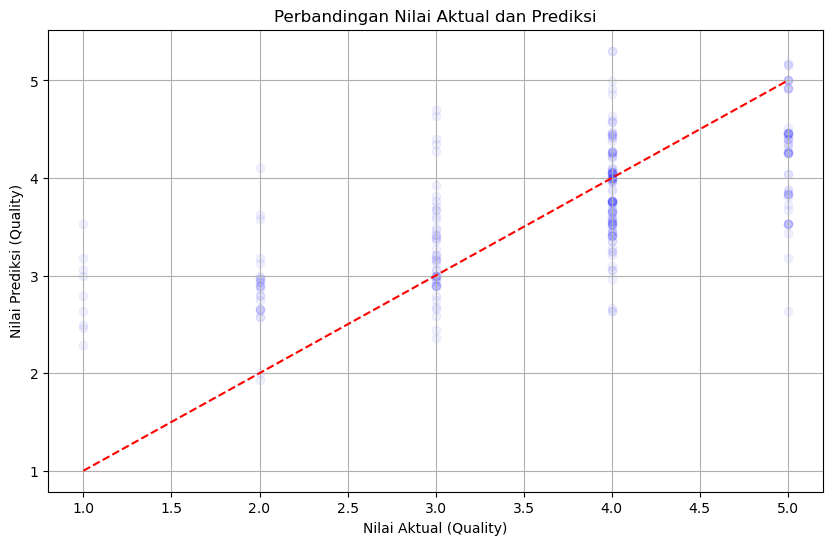

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_hat, color='blue', alpha=0.05)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Garis identitas
plt.xlabel("Nilai Aktual (Quality)")
plt.ylabel("Nilai Prediksi (Quality)")
plt.title("Perbandingan Nilai Aktual dan Prediksi")
plt.grid(True)
plt.show()

In [122]:
# 18. Cek multikolinearitas menggunakan VIF
# Menghitung VIF untuk setiap variabel
vif_data = pd.DataFrame()
vif_data["Variable"] = categorical_columns + ["Intercept"]
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Tampilkan hasil VIF
print("\nHasil VIF:")
print(vif_data)

# 19. Menghitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean(residuals**2))
print(f"\nRMSE = {rmse:.4f}")

# 20. Menghitung MSE
print(f"MSE = {MSE:.4f}")


Hasil VIF:
                                   Variable        VIF
0                        Color_Light Orange  29.505190
1                              Color_Orange   1.826112
2                          Color_Orange-Red   1.744065
3                       Color_Yellow-Orange   1.868590
4                      Variety_Blood Orange   1.676239
5               Variety_California Valencia   1.225427
6                         Variety_Cara Cara   1.763610
7                        Variety_Clementine   3.088097
8             Variety_Clementine (Seedless)   2.423353
9                            Variety_Hamlin   1.518681
10                  Variety_Honey Tangerine   1.594816
11                            Variety_Jaffa   1.901251
12                Variety_Midsweet (Hybrid)   2.237311
13                Variety_Minneola (Hybrid)   2.006760
14                     Variety_Moro (Blood)   2.562787
15                 Variety_Murcott (Hybrid)   2.618468
16                            Variety_Navel   1.33816

In [123]:
# 21. Tabel hasil uji t dengan keputusan tolak H₀ atau gagal tolak H₀
decision = ['Tolak H₀ (Signifikan)' if p < 0.05 else 'Gagal Tolak H₀ (Tidak Signifikan)' for p in p_values]

# Membuat DataFrame untuk hasil uji t
summary_df = pd.DataFrame({
    "Feature": ['Intercept'] + categorical_columns,  # Menambahkan 'Intercept' untuk kolom Intercept
    "Coef": beta,
    "Std Err": standard_errors,
    "t-value": t_values,
    "p-value": p_values,
    "Keputusan": decision  # Menambahkan kolom keputusan
})

# Output hasil uji t
print("\nHasil Uji Hipotesis t:")
print(summary_df)


Hasil Uji Hipotesis t:
                                    Feature      Coef   Std Err    t-value  \
0                                 Intercept  4.571453  0.300180  15.229053   
1                        Color_Light Orange -1.463547  0.169097  -8.655066   
2                              Color_Orange -0.863260  0.200258  -4.310730   
3                          Color_Orange-Red -0.589312  0.179998  -3.273984   
4                       Color_Yellow-Orange -0.767285  0.377357  -2.033317   
5                      Variety_Blood Orange -0.982142  0.674340  -1.456448   
6               Variety_California Valencia  0.350410  0.437012   0.801830   
7                         Variety_Cara Cara -0.467938  0.344329  -1.358986   
8                        Variety_Clementine -0.171551  0.367774  -0.466457   
9             Variety_Clementine (Seedless)  1.892094  0.533063   3.549476   
10                           Variety_Hamlin  0.060755  0.489625   0.124085   
11                  Variety_Honey Tanger